In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sys

In [2]:
#Просмотр входных данных на правильность
dataMovements = pd.read_csv("MiliAutomatMovements.csv", sep=',', header=0, index_col=0, encoding='cp1251', skipinitialspace=True, dtype=int)
dataOutputs = pd.read_csv("MiliAutomatOutputs.csv", sep=',', header=0, index_col=0, encoding='cp1251', skipinitialspace=True, dtype=int)
print("Данные выходов автомата Мили")
print(dataOutputs)
print()
print("Данные движений автомата Мили")
print(dataMovements)

Данные выходов автомата Мили
   1  2  3  4  5  6  7  8  9
1  0  1  1  0  1  0  1  1  0
2  1  0  0  1  1  1  1  0  1
3  1  0  0  1  0  1  0  0  1

Данные движений автомата Мили
   1  2  3  4  5  6  7  8  9
1  2  1  1  8  6  8  6  4  7
2  4  1  6  1  4  9  1  4  9
3  4  5  5  1  3  6  3  7  7


In [3]:
murDataMovements = pd.DataFrame()
    
existingOutputs = []
for i, j in dataMovements.iteritems():
    
    for k, l in j.items():
        if dataOutputs.loc[k][i] not in existingOutputs:
            existingOutputs.append(str(l) + "/" + str(dataOutputs.loc[k][i]))

existingOutputs.sort()

for k in existingOutputs:
    murDataMovements[k] = []
        
for i in range(0, dataMovements.shape[0]):
    murDataMovements = murDataMovements.append({murDataMovements.columns[0]: ""}, ignore_index=True)
    murDataMovements = murDataMovements.rename(index={i: i+1})
    
murDataMovements.index = [i for i in range(1, dataMovements.shape[0]+1)]

for i, j in murDataMovements.iteritems():
    nodeName = list(map(int, i.split("/")))
    for k, l in j.items():
        murDataMovements.loc[k, i] = str(dataMovements.loc[k][nodeName[0]-1]) + "/" + str(dataOutputs.loc[k][nodeName[0]-1])
print("Данные движений автомата Мура")
print()
print(murDataMovements)

Данные движений автомата Мура

   1/0  1/1  2/0  3/0  4/0  4/1  5/0  6/0  6/1  7/0  7/1  8/0  9/1
1  2/0  2/0  1/1  1/1  8/0  8/0  6/1  8/0  8/0  6/1  6/1  4/1  7/0
2  4/1  4/1  1/0  6/0  1/1  1/1  4/1  9/1  9/1  1/1  1/1  4/0  9/1
3  4/1  4/1  5/0  5/0  1/1  1/1  3/0  6/1  6/1  3/0  3/0  7/0  7/1


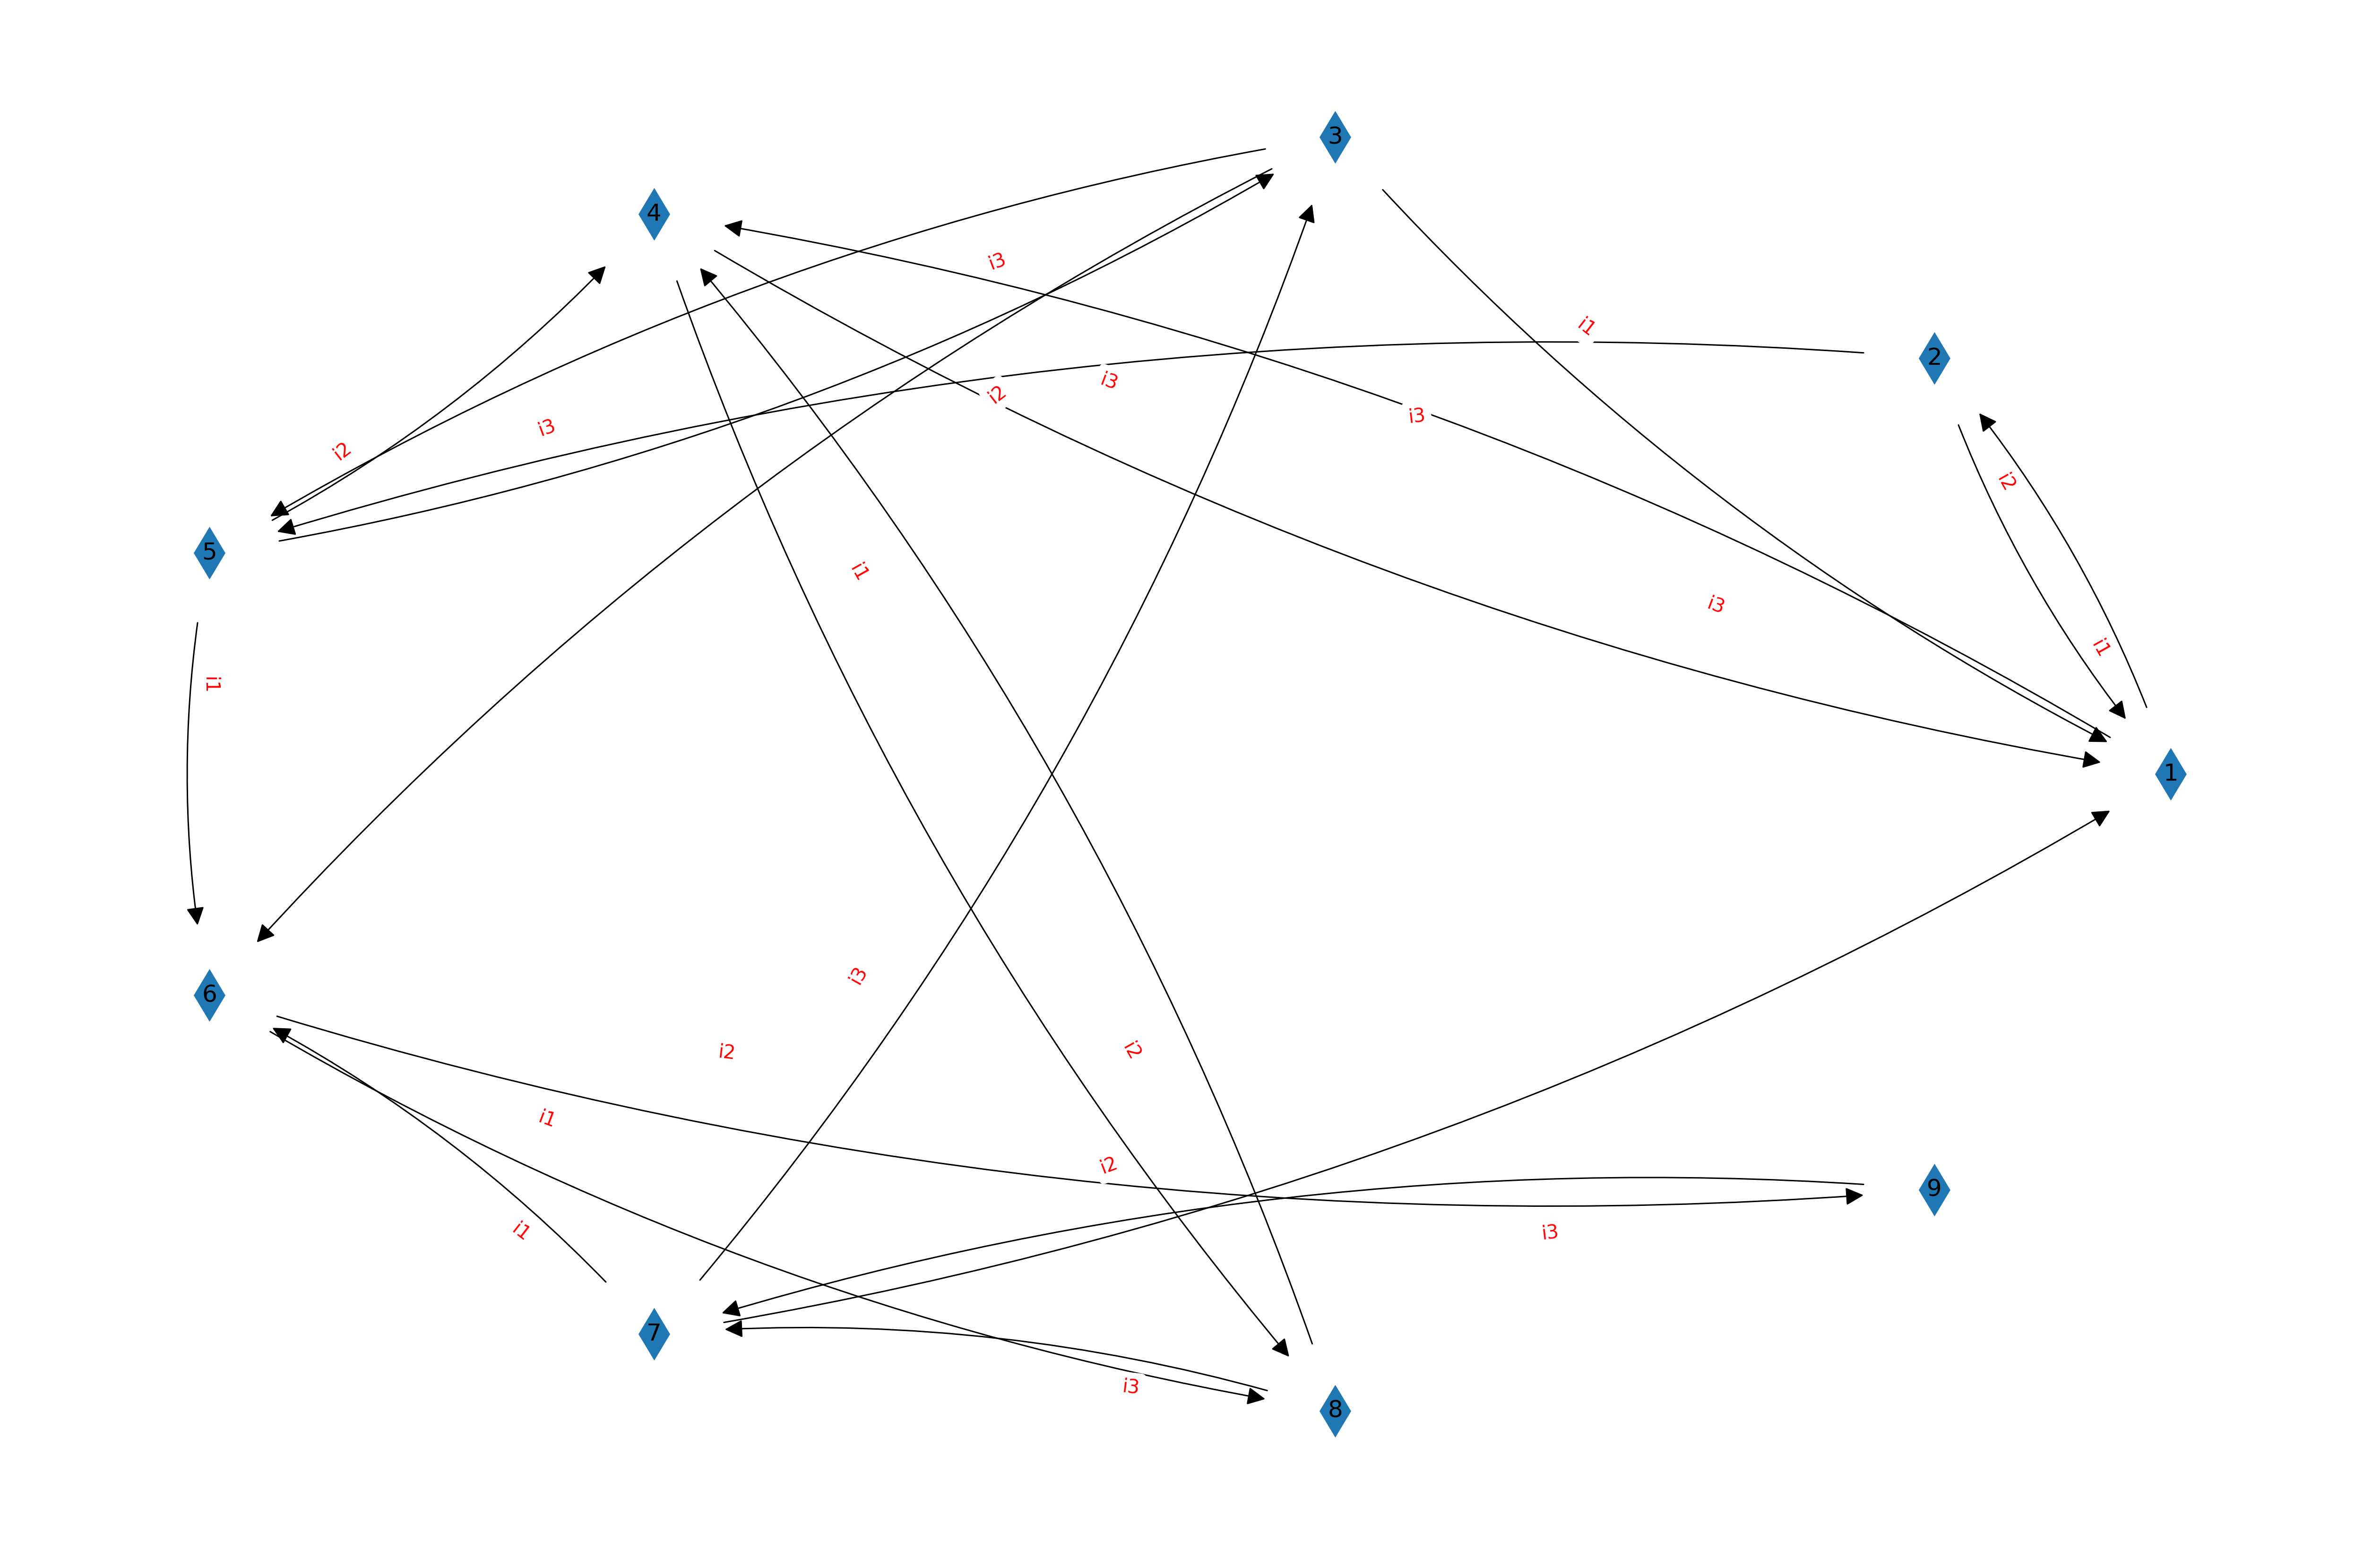

In [4]:
#Строим граф Мили до перевода в Мура
plt.figure(figsize=(90, 60))
G = nx.DiGraph()


for i, j in dataMovements.iteritems():
    G.add_node(i)
    
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        G.add_edge(i, str(l))

pos = nx.circular_layout(G)
        
for i, j in dataMovements.iteritems():
    for k, l in j.items():
        nx.draw_networkx_edge_labels(G, pos, label_pos=0.7, edge_labels = {(i, str(l)): "i" + str(k)}, font_color='red', font_size=40, verticalalignment="center")


nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape="d")
## edges
nx.draw_networkx_edges(G, pos, width=3, arrowsize=80, min_source_margin=150, min_target_margin=150, connectionstyle="arc3, rad=0.1")

nx.draw_networkx_labels(G, pos, font_size=50, font_family='sans-serif')
plt.axis('off')

plt.show()

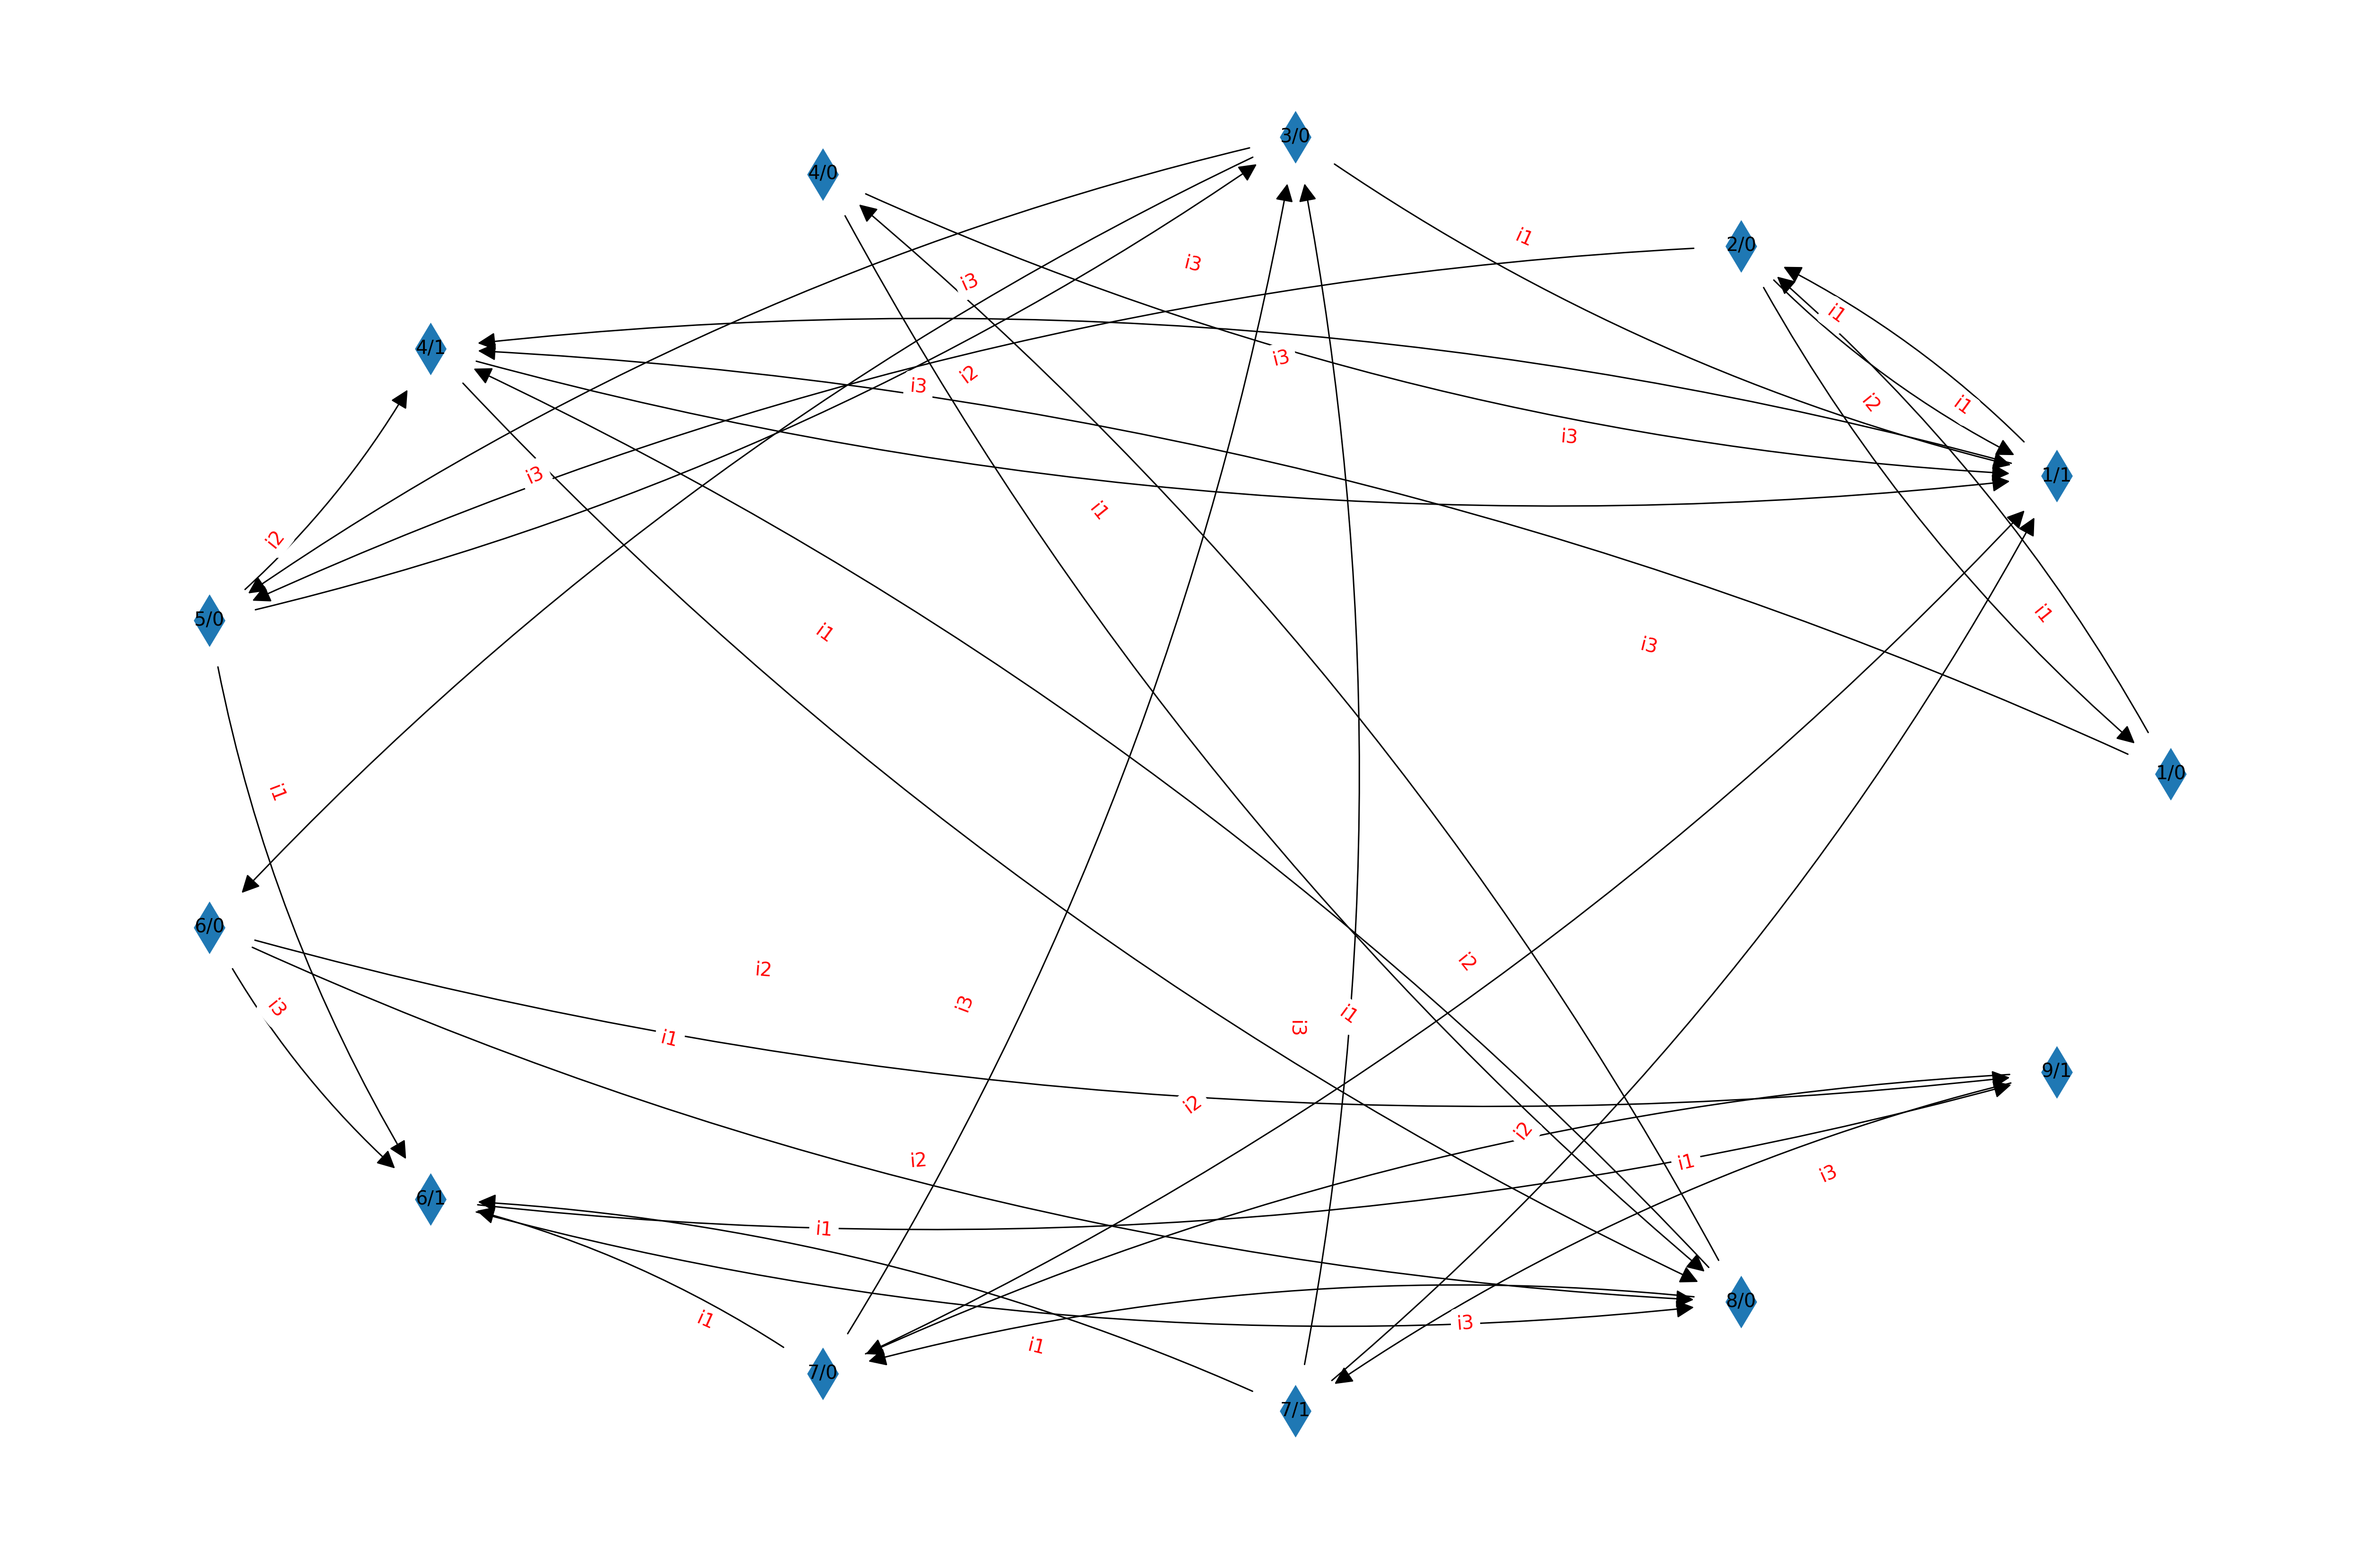

In [5]:
#Строим граф Мура
plt.figure(figsize=(90, 60))
G = nx.DiGraph()

for i, j in murDataMovements.iteritems():
    G.add_node(i)

#вот тут код который был до
    
pos = nx.circular_layout(G)
    
for i, j in murDataMovements.iteritems():
    for k, l in j.items():
        G.add_edge(i, l)
        nx.draw_networkx_edge_labels(G, pos, label_pos=0.7, edge_labels = {(i, l): "i" + str(k)}, font_color='red', font_size=40, verticalalignment="center")

#до сюда
#а вот на это я исправил

for i, j in murDataMovements.iteritems():
    for k, l in j.items():
        G.add_edge(i, l)

pos = nx.circular_layout(G)
        
for i, j in murDataMovements.iteritems():
    for k, l in j.items():
        nx.draw_networkx_edge_labels(G, pos, label_pos=0.7, edge_labels = {(i, l): "i" + str(k)}, font_color='red', font_size=40, verticalalignment="center")

#до сюда... так сказать найди 5 отличий
        
nx.draw_networkx_nodes(G, pos, node_size=6000, node_shape="d")
## edges
nx.draw_networkx_edges(G, pos, width=3, arrowsize=80, min_source_margin=100, min_target_margin=100, connectionstyle="arc3, rad=0.1")

nx.draw_networkx_labels(G, pos, font_size=40, font_family='sans-serif')
plt.axis('off')

plt.show()